In [1]:
%matplotlib inline

from matplotlib import rc
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imshow, quiver

In [2]:
import numpy as np
from numpy.random import randn

In [3]:
import hessian_cecp as hcecp

Can't load imreg package, affine and homography registrations won't work


In [4]:
import os
import sys

In [5]:
import ccdb
import napari

from tqdm.auto import tqdm
from scipy import ndimage as ndi

## Построение векторов в matplotlib

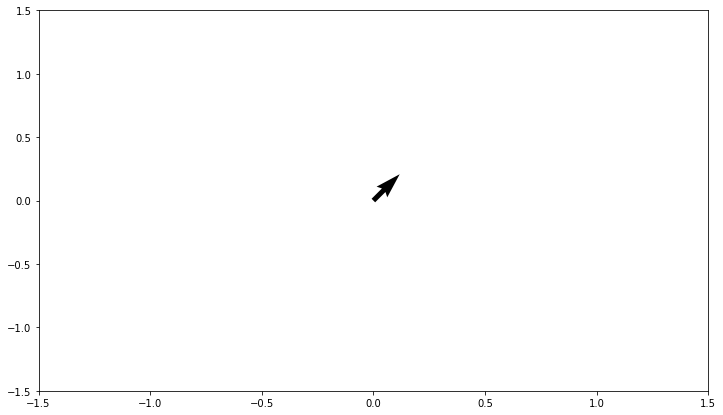

In [5]:
x_position = [0]
y_position = [0]
x_direction = [1]
y_direction = [1]
fig, ax = plt.subplots(figsize = (12,7))
ax.quiver(x_position, y_position, x_direction, y_direction)
ax.axis([-1.5, 1.5, -1.5, 1.5])
plt.show()

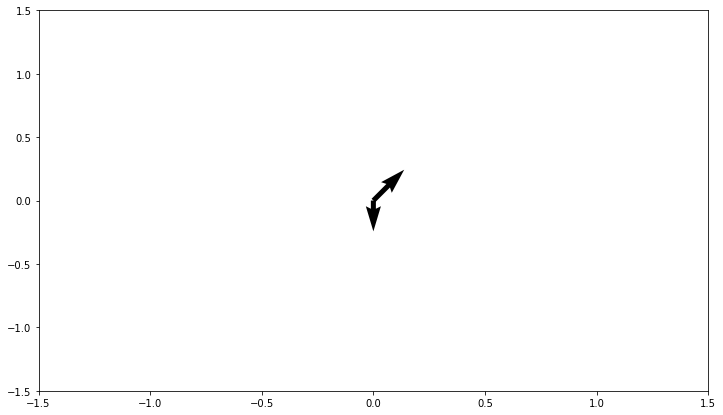

In [6]:
x_position = [0,0]
y_position = [0,0]
x_direction = [1,0]
y_direction = [1,-1]
fig, ax = plt.subplots(figsize = (12,7))
ax.quiver(x_position, y_position, x_direction, y_direction)#, scale = 5)
ax.axis([-1.5, 1.5, -1.5, 1.5])
plt.show()

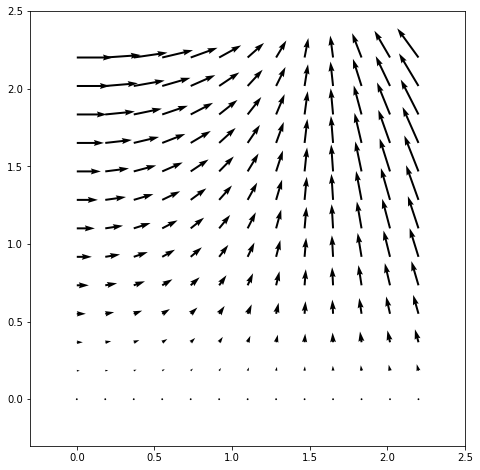

In [7]:
x_position = np.linspace(0, 2.2, 13)
y_position = np.linspace(0, 2.2, 13)
# y_position = [2]
X,Y = np.meshgrid(x_position, y_position)
u=np.cos(X)*Y
v=np.sin(Y)*X
fig, ax = plt.subplots(figsize = (14,8))
m, k, l=0, 14, 1
# ax.quiver(X[m:k:l], Y[m:k:l])#, u[m:k:l], v[m:k:l])
ax.quiver(X, Y, u, v, angles='uv')
ax.axis([-0.3, 2.5, -0.3, 2.5])
ax.set_aspect('equal')
plt.show()

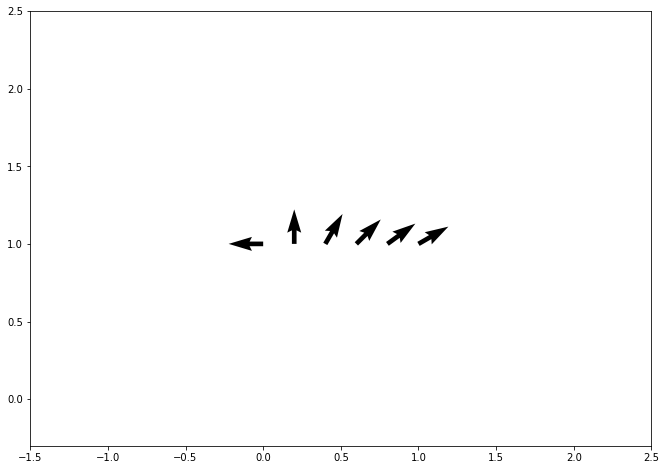

In [8]:
x_position = np.linspace(0, 1, 6)
# y_position = np.linspace(0, 1, 6)
y_position = [1]
X,Y = np.meshgrid(x_position, y_position)
u = np.zeros(X.shape)
u[:] = [np.cos(np.pi/i) for i in range(1, 7)]
v = np.zeros(X.shape)
v[:] = [np.sin(np.pi/i) for i in range(1, 7)]
scale = np.ravel(np.cos(X)*Y)*2.
fig, ax = plt.subplots(figsize = (14,8))
ax.quiver(X, Y, u, v,)#, scale=scale, scale_units='inches')
ax.axis([-1.5, 2.5, -0.3, 2.5])
ax.set_aspect('equal')
plt.show()

In [ ]:
u, v = 

In [ ]:
napari.view_vectors()

In [11]:
# sample vector coord-like data
n = 200
pos = np.zeros((n, 2, 2), dtype=np.float32)
phi_space = np.linspace(0, 4 * np.pi, n)
radius_space = np.linspace(0, 20, n)

# assign x-y position
pos[:, 0, 0] = radius_space * np.cos(phi_space)# + 64
pos[:, 0, 1] = radius_space * np.sin(phi_space)# + 64

# assign x-y projection
pos[:, 1, 0] = radius_space * np.cos(phi_space)
pos[:, 1, 1] = radius_space * np.sin(phi_space)

planes = np.round(np.linspace(0, 128, n)).astype(int)
planes = np.concatenate(
    (planes.reshape((n, 1, 1)), np.zeros((n, 1, 1))), axis=1
)
vectors = np.concatenate((planes, pos), axis=2)

# add the sliced vectors
layer = napari.view_vectors(
    vectors, edge_width=0.4, name='sliced vectors', edge_color='blue'
)

layer.dims.ndisplay = 3

napari.run()

In [ ]:
n = 1
pos = np.zeros((n, 2, 2))
phi = np.pi/4
radius = 1

pos[:, 0, 0] = radius * np.cos(phi)
pos[:, 0, 1] = radius * np.sin(phi)

pos[:, 1, 0] = radius * np.cos(phi)
pos[:, 1, 1] = radius * np.sin(phi)

planes = np.round([0]).astype(int)
planes = np.concatenate(
    (planes.reshape((n, 1, 1)), np.zeros((n, 1, 1))), axis=1
)
vectors = np.concatenate((planes, pos), axis=2)


napari.view_vectors(vectors, edge_width=0.4, name='sliced vectors', edge_color='blue')
napari.run()

## Построение векторов в napari

Добавим границы по сетке чтобы был фон  были видны границы изображения в целом

In [122]:
rect = np.zeros((4,3))
rect[0] = [0, 0, 0]
rect[1] = [1, 0, 0]
rect[2] = [1, 1, 0]
rect[3] = [0, 1, 0]

rect1 = np.zeros((4,3))
rect1[0] = [0, 0, 0]
rect1[1] = [0, 1, 0]
rect1[2] = [0, 1, 1]
rect1[3] = [0, 0, 1]

rect2 = np.zeros((4,3))
rect2[0] = [0, 0, 0]
rect2[1] = [1, 0, 0]
rect2[2] = [1, 0, 1]
rect2[3] = [0, 0, 1]

In [123]:
viewer = napari.view_shapes(rect, face_color='white',
                            edge_width=0,
                            name='bounding box')
viewer.add_shapes(rect1, face_color='white',
                            edge_width=0,
                            name='bounding box')
viewer.add_shapes(rect2, face_color='white',
                            edge_width=0,
                            name='bounding box')

<Shapes layer 'bounding box [2]' at 0x7fce37c6df70>

In [125]:
arr = np.zeros((4,2,3))
arr[0] = [[0, 0, 0], [1, 1, 1]]
arr[1] = [[0, 0, 0], [1, 0, 0]]
arr[2] = [[0, 0, 0], [0, 0, 1]]
viewer.add_vectors(arr, edge_width=0.2, name='sliced vectors', edge_color='blue')


<Vectors layer 'sliced vectors [1]' at 0x7fce37962400>

## Тестовая картинка

### Линии

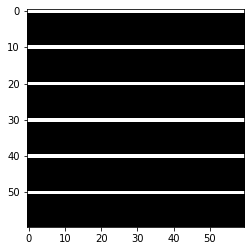

In [77]:
img_lines = np.zeros((100,100))
img_lines[::10] = 1
# img_lines[23:78,50:52] = 1
# img_lines = ndi.rotate(img_lines, 24)
img_lines = img_lines[20:-20,20:-20]

img_lines = np.clip(img_lines, 0, 1)
crop = (slice(20,-20), slice(20,-20))
img = img_lines
imshow(img, cmap='gray', interpolation='nearest')

In [ ]:
SNR = 5
img_noisy = SNR*img + randn(*img.shape)
imshow(img_noisy, cmap='gray',interpolation='nearest')

### Повернутый крест

In [51]:
img_cross = np.zeros((100,100))
img_cross[50:52, 23:78] = 1
img_cross[23:78,50:52] = 1
img_cross = ndi.rotate(img_cross, 24)
img_cross = img_cross[20:-20,20:-20]

img_cross = np.clip(img_cross, 0, 1)
crop = (slice(20,-20), slice(20,-20))
img = img_cross[crop]

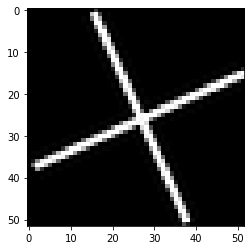

In [52]:
# figure()
imshow(img, cmap='gray', interpolation='nearest')

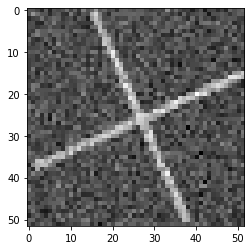

In [53]:
SNR = 5
img_noisy = SNR*img + randn(*img.shape)
imshow(img_noisy, cmap='gray',interpolation='nearest')

### 3D изображение

In [6]:
img_3d = np.zeros((100, 100, 100))
img_3d[50:52:10, 23:78:10] = 1
img_3d[23:78:10, 50:52:10] = 1
img_3d = ndi.rotate(img_3d, 24)
img_3d = img_3d[20:-20,20:-20]


img_3d = np.clip(img_3d, 0, 1)
crop = (slice(20,-20), slice(20,-20))
img = img_3d[crop]

In [7]:
napari.view_image(img)
napari.run()

In [8]:
SNR = 5
img_noisy = SNR*img + randn(*img.shape)

## Вектора Матрицы Гессе

In [9]:
def threshold_obj_size(mask, min_size=3):
    out = np.zeros(mask.shape, np.bool)
    labels, nl = ndi.label(mask)
    objs = ndi.find_objects(labels)
    for i,o in enumerate(objs):
        submask = labels[o]==i+1
        sz = np.sum(submask)
        if sz >= min_size:
            out[o][submask] = True
    return out

def sato2d_ms(img, scales):
    return np.max([hcecp.sato2d(img, scale)*scale**2 for scale in scales], axis=0)

import ucats
def noise_assisted_sato(img, sigmas, noise_sigma=None, threshold=0.1, niters=100, noise_scaling=1):
    out = np.zeros_like(img)
    if noise_sigma is None:
        noise_sigma = ucats.mad_std(img)
        print('estimated noise sigma:', noise_sigma)
    for i in tqdm(range(niters)):
        img_n = img + randn(*img.shape)*noise_sigma*noise_scaling
        #img_n = ucats.scramble.local_jitter2d(img,1,1)
        #sx = skfilters.sato(img_n, sigmas, black_ridges=False, mode='constant')
        #sx = np.max([sato2d(img, s)*s**2 for s in sigmas], axis=0)
        sx = sato2d_ms(img_n, sigmas)
        out += threshold_obj_size(sx > threshold)
        #out += sx > threshold
        #out += sx
    return out/niters

In [10]:
scales = [0.5, 0.75,  1, 1.5,  2, 3, 4, 6, 8, 12, 16]

In [11]:
sato = np.max(sato_scales,0)
sigma = 3

NameError: name 'sato_scales' is not defined

In [ ]:
sato, Vf = hcecp.sato2d(img_noisy, sigma, hessian_variant='gradient_of_smoothed', return_vectors=True)

In [ ]:
# imgx_sato =np.max(sato_scales, 0)

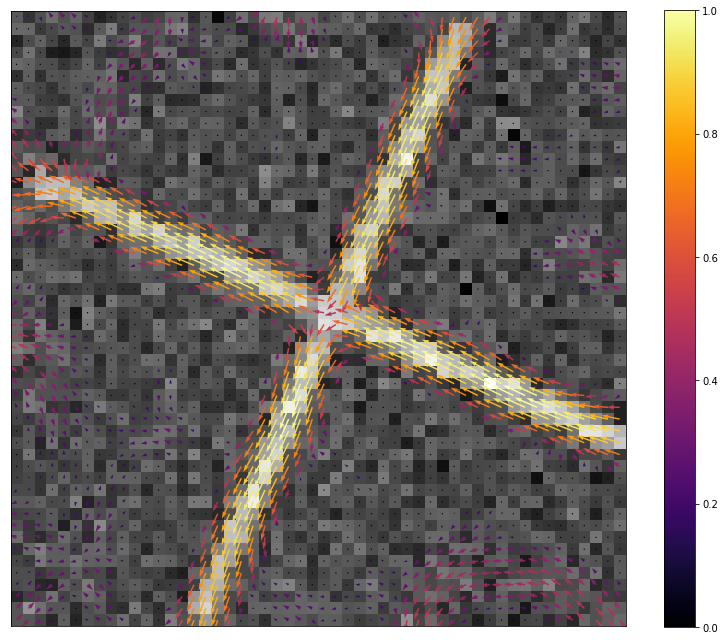

In [58]:
plt.figure(figsize=(11,9))
imshow(img_noisy,cmap='gray', origin='lower')

#lamc = lam[crop]
#mask = (lam[...,0] < 0) & ((lam[...,1] <= 0) | (lam[...,1] < np.abs(lam[...,0])/0.5))
#weights = percentile_rescale(np.abs(lam[...,0]))*mask
weights = hcecp.percentile_rescale(sato)**0.5
#weights = skimage.filters.sato(imgx,[sigma],black_ridges=False)[crop]


i = 0
Vfx = Vf[...,i][...,::-1]

V = Vfx[...,0] # row directions (Y)
U = Vfx[...,1] # col directions (X)
#V,U = Vf[crop][...,0]
plt.setp(plt.gca(), xticks=[],yticks=[])
# h = quiver(U*weights, V*weights, weights, scale=25, cmap='inferno')
h = quiver(U*weights, V*weights, weights, scale=25, cmap='inferno')
plt.colorbar(h, ax=plt.gca())
#quiver(U*weights,V*weights,color='m', scale=100,)
plt.tight_layout()

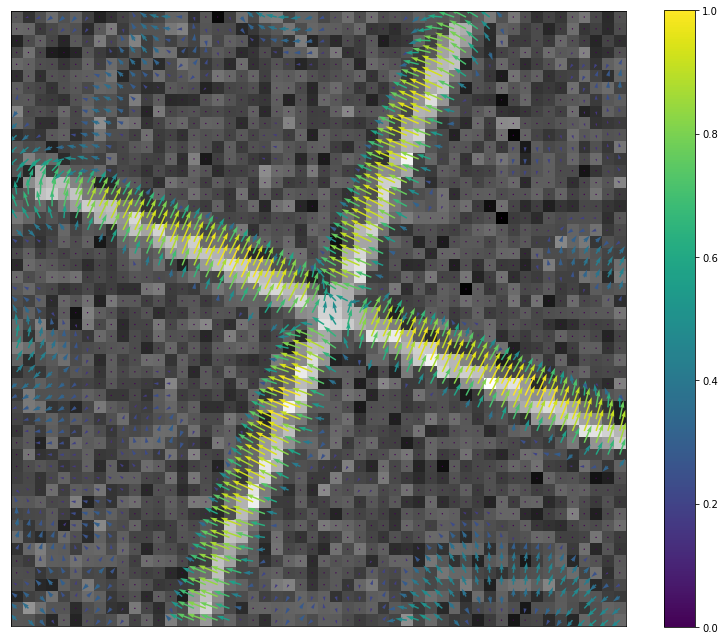

In [59]:
plt.figure(figsize=(11,9))
imshow(img_noisy, cmap='gray', origin='lower')

#lamc = lam[crop]
#mask = (lam[...,0] < 0) & ((lam[...,1] <= 0) | (lam[...,1] < np.abs(lam[...,0])/0.5))
#weights = percentile_rescale(np.abs(lam[...,0]))*mask
weights = hcecp.percentile_rescale(sato)**0.5
#weights = skimage.filters.sato(imgx,[sigma],black_ridges=False)[crop]


i = 1
Vfy = Vf[...,i][...,::-1]

V = Vfy[...,0] # row directions (Y)
U = Vfy[...,1] # col directions (X)
#V,U = Vf[crop][...,0]
plt.setp(plt.gca(), xticks=[],yticks=[])
h = quiver(U*weights,V*weights,weights,scale=25,cmap='viridis')
plt.colorbar(h, ax=plt.gca())
#quiver(U*weights,V*weights,color='m', scale=100,)
plt.tight_layout()

## Построение собственных векторов в напари

- Начальные позиции: x, y
- Направления: u, v
- Длины: weights -> length
- Конечные позиции: x1, y1

In [9]:
sigma = 1

In [14]:
sato, Vf = hcecp.sato3d(img_noisy, sigma, hessian_variant='gradient_of_smoothed', return_vectors=True)

In [11]:
weights = hcecp.percentile_rescale(sato)**0.5

i = 0
Vfx = Vf[...,i][...,::-1]

V = Vfx[...,0] # row directions (Y)
U = Vfx[...,1] # col directions (X)
C = Vfx[...,2]

In [12]:
nr, nc, nd = (1, U.shape[0]) if U.ndim == 1 else U.shape
indexgrid = np.meshgrid(np.arange(nc), np.arange(nr), np.arange(nd))
x, y, z = [np.ravel(a) for a in indexgrid]

In [13]:
u = U.ravel()
v = V.ravel()
c = C.ravel()
length = weights.ravel()

Каждый вектор получая начальную точку начинает считать от неё. Поэтому для определения конца вектора достаточно указать его относительно самого вектора

In [17]:
x1, y1, z1 = u*length, v*length, c*length

Вектора отображаются транспонировано. Хз почему. Поэтому меняем местами х и у

In [18]:
vectors = np.zeros((u.shape[0], 2, 3))
vectors[...,0, 0] = y
vectors[...,0, 1] = x
vectors[...,0, 2] = z
vectors[...,1, 0] = y1
vectors[...,1, 1] = x1
vectors[...,1, 2] = z1

In [19]:
list(napari.utils.colormaps.AVAILABLE_COLORMAPS)

['PiYG',
 'blue',
 'bop blue',
 'bop orange',
 'bop purple',
 'cyan',
 'gist_earth',
 'gray',
 'gray_r',
 'green',
 'hsv',
 'inferno',
 'magenta',
 'magma',
 'plasma',
 'red',
 'turbo',
 'twilight',
 'twilight_shifted',
 'viridis',
 'yellow']

In [20]:
length.shape

(270400,)

In [ ]:
viewer = napari.view_image(img_noisy)

properties = {'length': length}

viewer.add_vectors(vectors, edge_width=0.1, 
                   length=1,  properties=properties,
                   edge_color='length', edge_colormap='inferno')
napari.run()

In [10]:
from importlib import reload

In [11]:
import hessian_vectors as hv

In [12]:
reload(hv)

<module 'hessian_vectors' from '/home/incredible/Neuroscience/Code/src/hessian_vectors.py'>

In [17]:
# vectors, length = hv.parse_sato(sato, Vf)
viewer = napari.view_image(img_noisy)
hv.add_hessian_vectors(viewer, sato, Vf, parser=hv.parse_sato, axis=0)
napari.run()

In [1]:
def add_hessian_vectors(viewer, vectors, lengths, axis=0):
    Vfx = vectors[..., axis][..., ::-1]

    V = Vfx[...,0] # row directions (Y)
    U = Vfx[...,1] # col directions (X)
    C = Vfx[...,2]
    
    nr, nc, nd = (1, U.shape[0]) if U.ndim == 1 else U.shape
    indexgrid = np.meshgrid(np.arange(nc), np.arange(nr), np.arange(nd))
    x, y, z = [np.ravel(a) for a in indexgrid]
    
    u = U.ravel()
    v = V.ravel()
    c = C.ravel()
    length = lenghts.ravel()
    
    x1, y1, z1 = u*length, v*length, c*length
    
    vectors = np.zeros((u.shape[0], 2, 3))
    vectors[...,0, 0] = y
    vectors[...,0, 1] = x
    vectors[...,0, 2] = z
    vectors[...,1, 0] = y1
    vectors[...,1, 1] = x1
    vectors[...,1, 2] = z1
    
    properties = {'length': length}

    viewer.add_vectors(vectors, edge_width=0.1, 
                       length=1,  properties=properties,
                       edge_color='length', edge_colormap='inferno')
    return viewer